# Vocal tract modelling

In this notebook, the geometry of a vocal tract will be inferred using the boundary element method (BEM) and a genetic algorithm. First, the BEM will be used to build an acoustic model of a vocal tract. 

In [1]:
include("../BEM_base.jl"); # The BEM algorithms are defined in the BEM_base

In [2]:
# Set the msh file location
file = "../dados/vocal_tract/vocal_tract_A_bothclosed.msh";
# Build the domain points
L = 140; # Length of the vocal tract
n_pint = 50; # Number of domain points
PONTOS_int = zeros(n_pint,4);
delta = 1; # distance from both ends 
passo = (L-2*delta)/(n_pint-1);
for i = 1:n_pint
    PONTOS_int[i,:] = [i 0 0 delta+(i-1)*passo];
end
# Set the boundary conditions for each face. Vowel /A/ model has 30 faces
BCFace = ones(30,3);
BCFace[:,3] = 0;
BCFace[1,:] = [1 0 -1]; # Neumann (flux = 1) to the Glotis
BCFace[30,:] = [30 0 0]; # Dirichlet (pressure = 0) to the mouth
CW = 343*1000; # Speed of sound in mm/s
k = 774/CW/2/pi; # Set the wavenumber
# Solve the BEM model
u,q,uint,qint = BEM_base(file,PONTOS_int,BCFace,k, "wave");

Importing mesh...
  6.969884 seconds (640.19 k allocations: 32.938 MiB, 0.52% gc time)
Building G and H matrices...
 12.301260 seconds (224.64 M allocations: 10.573 GiB, 19.48% gc time)
Applying boundary conditions to build A and b for the linear system...
  0.444058 seconds (3.95 k allocations: 24.210 MiB, 1.02% gc time)
Solving the linear system...
  1.304230 seconds (403.35 k allocations: 30.578 MiB, 1.20% gc time)
Separating acoustic pressure from flux...
  0.057604 seconds (3.62 k allocations: 222.430 KiB)
Solving for domain points.
  0.709244 seconds (13.65 M allocations: 658.150 MiB, 19.60% gc time)
  1.593239 seconds (31.97 M allocations: 1.196 GiB, 15.18% gc time)


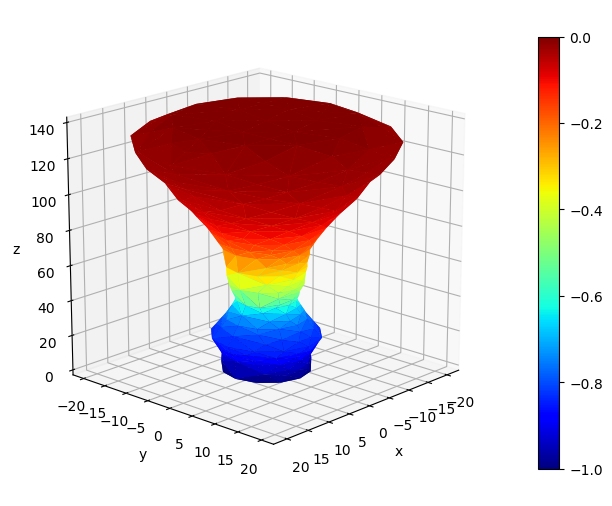

  0.011279 seconds (49.26 k allocations: 1.606 MiB)


In [7]:
@time mshinfo = const3D_tri.lermsh(file,3) #Read the mesh generated 
NOS_GEO,ELEM,elemint,CDC = mshinfo;
const3D_tri.mostra_resultados2(NOS_GEO,ELEM,real.(u[:,1]));